In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
df = pd.read_csv("Malware dataset.csv")

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
target_variable = correlation_matrix.abs().sum().idxmax()

sampled_df = numeric_df.sample(n=5000, random_state=42)

X = sampled_df.drop(columns=[target_variable])
y = sampled_df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
error = np.mean(abs(y_test - y_pred))


R² Score (Accuracy): 0.9989
Mean Squared Error (MSE): 0.5572
Mean Absolute Error: 0.2957


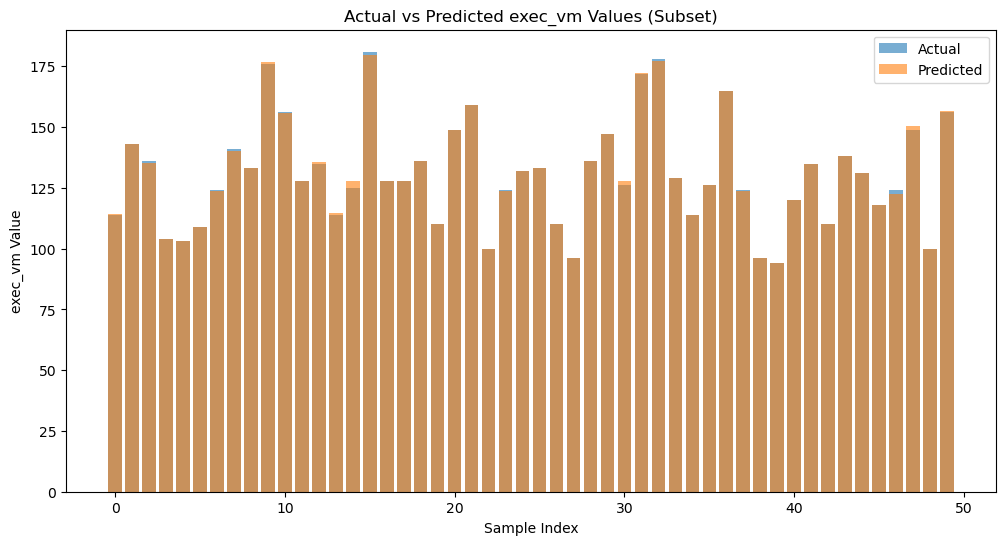

In [ ]:
print(f"R² Score (Accuracy): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error: {error:.4f}")

plt.figure(figsize=(12, 6))
plt.bar(range(50), y_test[:50], label="Actual", alpha=0.6)
plt.bar(range(50), y_pred[:50], label="Predicted", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel(f"{target_variable} Value")
plt.title(f"Actual vs Predicted {target_variable} Values (Subset)")
plt.legend()
plt.show()
